In [11]:
import numpy as np
import rebound as rb
import reboundx as rx
import matplotlib.pyplot as plt

In [23]:
def system_evolution(archive, extras):
    """ 
    Pulling data from the called upon simulation archive using REBOUND and REBOUNDx to collect evolution of
    the secondary binary in the simulation. 
    """ # UPDATE THIS DESCRIPTION
    sim = None
    sim = rx.SimulationArchive(archive, rebxfilename=extras)
    sim_time = []
    
    # SECONDARY BINARY
    b2_ecc = []
    b2_semi = []
    b2_period = []
    
    for snap in range(len(sim)):
        base = sim[snap][0]
        time = base.t
        
        # SECONDARY BINARY        
        b2_a = base.particles["Binary 2"].a
        b2_e = base.particles["Binary 2"].e
        b2_P = base.particles["Binary 2"].P
        
        b2_ecc.append(b2_e)
        b2_semi.append(b2_a)
        b2_period.append(b2_P)
        sim_time.append(time)

    return sim_time, b2_ecc, b2_semi, b2_period

In [82]:
planet_hash = []

for num in range(1,16):
    planet = f"Planet {num}"
    planet_hash.append(planet)
    
#planet_hash

In [105]:
for planet in planet_hash:
    print(planet, type(planet))

Planet 1 <class 'str'>
Planet 2 <class 'str'>
Planet 3 <class 'str'>
Planet 4 <class 'str'>
Planet 5 <class 'str'>
Planet 6 <class 'str'>
Planet 7 <class 'str'>
Planet 8 <class 'str'>
Planet 9 <class 'str'>
Planet 10 <class 'str'>
Planet 11 <class 'str'>
Planet 12 <class 'str'>
Planet 13 <class 'str'>
Planet 14 <class 'str'>
Planet 15 <class 'str'>


In [114]:
def planet_evolution(archive, extras):
    """
    This one includes the planet hashes
    USE TRY, EXCEPT STATEMENT
    """
    
    sim = None
    sim = rx.SimulationArchive(archive, rebxfilename=extras)
    
    planet_semi = []
    planet_ecc = []
    sim_time = []
    
    for planet in planet_hash:
        a = []
        e = []
        t = []
        for snap in range(len(sim)):            
            try:
                base = sim[snap][0]
                time = base.t
                
                plan_a = base.particles[planet].a
                plan_e = base.particles[planet].e
            
                a.append(plan_a)
                e.append(plan_e)
                t.append(time)
                
            except: # move onto the next iteration/planet
                continue  

        planet_semi.append(a)
        planet_ecc.append(e)
        sim_time.append(t)
        
    return sim_time, planet_semi, planet_ecc            

In [140]:
e_b = np.linspace(0, 0.8, tup_num)
a_p = np.linspace(1, 5, tup_num)

In [141]:
a_val = np.round(a_p[19], 3) # INITIAL PLANETARY SEMI-MAJOR AXIS UNDER EVALUATION
a_val

2.551

In [142]:
e_val = np.round(e_b[-8],3) # INITIAL BINARY ECCENTRICITY UNDER EVALUATION
e_val

0.686

In [ ]:
# TURN THIS INTO A FUNCTION THAT DOES EITHER BINARY OR PLANETS
sim_arch_directory = "/mnt/raid-cita/ksmith/cope/"
xarch = "/mnt/raid-cita/ksmith/cope/xarchive_single_Qs10.npy"

In [143]:
evolution = []

ev = system_evolution(sim_arch_directory+f"sim_archive_Q10.0_eb{e_val}_ap{a_val}.npy", xarch)
evolution.append(ev)

In [145]:
planet_evolution(sim_arch_directory+f"sim_archive_Q10.0_eb{e_val}_ap{a_val}.npy", xarch)

([[], [], [], [], [], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], [], [], [], [], []],
 [[], [], [], [], [], [], [], [], [], [], [], [], [], [], []])

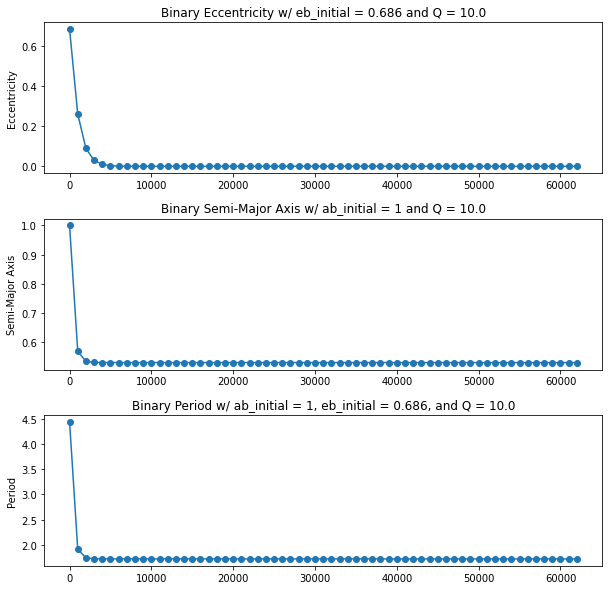

In [144]:
fig, axs = plt.subplots(3, figsize=(10,10))

axs[0].plot(evolution[0][0], evolution[0][1])
axs[0].scatter(evolution[0][0], evolution[0][1])
axs[0].set_title(f"Binary Eccentricity w/ eb_initial = {e_val} and Q = {1e1}")
axs[0].set_ylabel("Eccentricity")

axs[1].plot(evolution[0][0], evolution[0][2])
axs[1].scatter(evolution[0][0], evolution[0][2])
axs[1].set_title(f"Binary Semi-Major Axis w/ ab_initial = 1 and Q = {1e1}")
axs[1].set_ylabel("Semi-Major Axis")

axs[2].plot(evolution[0][0], evolution[0][3])
axs[2].scatter(evolution[0][0], evolution[0][3])
axs[2].set_title(f"Binary Period w/ ab_initial = 1, eb_initial = {e_val}, and Q = {1e1}")
axs[2].set_ylabel("Period")

# SHARE X AXIS
# LABEL X AND Y AXES
plt.subplots_adjust(hspace=0.3)

In [8]:
test = binary_ev("/mnt/raid-cita/ksmith/cope/sim_archive_Q10.0_eb0.800_ap2.551.npy", "/mnt/raid-cita/ksmith/cope/xarchive_single_Qs10.npy")
#test

In [ ]:
#fig, ax = plt.subplots(1, Nq, figsize=(40,8), sharey=True)#, constrained_layout=True)
#ax = ax.ravel()

In [ ]:


# file = "/mnt/raid-cita/ksmith/cste/raw_surv_time_Q{:.1f}_eb{:.3f}_ap{:.3f}.npy"
# raw_surv_time_Q10.0_eb0.082_ap2.469.npy

In [ ]:
def planetary_ev(archive, extras):
    """
    Pulling data from the called upon simulation archive using REBOUND and REBOUNDx to collect evolution of
    the planets in the simulation.
    """
    sim = None
    sim = rx.SimulationArchive(archive, rebxfilename=extras)
    #sim_time = []
    
    Np = 15
    planet_ecc = []
    planet_semi = []    
    
    for planet in range(2, Np+1):
        time = []
        eccentricity = []
        semi_major = []
        
        for snap in range(len(sim)):
            t = sim[snap][0].t
            base = sim[snap][0].particles[planet]
            ecc = base.e
            semi = base.a
            
            time.append(t)
            eccentricity.append(ecc)
            semi_major.append(semi)
        
        planet_ecc.append([time,eccentricity])
        planet_semi.append([time, semi_major])
        
    return planet_ecc, planet_semi